In [363]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Examining the "TRANSACTION DATA"

# Check list:

##  Identifying rows and columns:
- This dataset contains 264836 observations and 8 variables

## Identifying data types: 
- 7 quantitative variables (float64 + int64) 
- 1 qualitative variable (Object)

## Checking the missing values :
- No messing values : 264836 /264836 values --> 0 nan values

In [364]:
#read transaction_data
data1= pd.read_excel("QVI_transaction_data.xlsx")
data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [365]:
df1=data1.copy()
print(f' this dataset contains {df1.shape[0]} observations and {df1.shape[1]} features')

 this dataset contains 264836 observations and 8 features


In [366]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [367]:
df1.dtypes.value_counts()#.plot.pie() 

int64      6
float64    1
object     1
dtype: int64

In [368]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [369]:
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True)

DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64

# Examining the "CUSTOMER DATA" 

# Check list:

##  Identifying rows and columns:
- This dataset contains 72637 rows and 3 columns

## Identifying data types: 
- 1 quantitative variables (int64) 
- 2 qualitative variable (Object)

## Checking the missing values :
- No messing values : 72637 /72637 values --> 0 nan values

In [370]:
data2= pd.read_csv("QVI_purchase_behaviour.csv")
data2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [371]:
df2=data2.copy()
print(f' this dataset contains {df2.shape[0]} observations and {df2.shape[1]} features')

 this dataset contains 72637 observations and 3 features


In [372]:
df2.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [373]:
df2.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [374]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [375]:
(df2.isna().sum()/df2.shape[0]).sort_values(ascending=True)

LYLTY_CARD_NBR      0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64

# Merge the transaction and customer data together 

In [376]:
df_=df1.merge(df2)
df_.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,YOUNG SINGLES/COUPLES,Premium


In [377]:
df_.shape

(264836, 10)

# Data analysis and customer segments

# Check list:
## Visualize quantitative variables:
- Date, STORE_NBR,LYLTY_CARD_NBR,TXN_ID ,PROD_NBR,PROD_QTY,TOT_SALES show an asymmetric distributions.
- Date has incorrect data format (int64), we suppose that:
    - DATE may be represent days in year : 
        - len(df_['DATE'].unique())=364 --> missing data 
    - Date may be represent list transactions by date --> we convert it to the date format
        -first date    2018-07-01 
        -last date    2019-06-30
    
- LYLTY_CARD_NBR and TXN_ID have the same distribution, we choose to work with only LYLTY_CARD_NBR column.
- STORE_NBR may be dropped
- We can create a dictionary that associate {PROD_NBR:PROD_NAME}
- PROD_QTY: - most customers buy 2 chips (PROD_QTY.quantile.75==2) 
            - only one customer with 'LYLTY_CARD_NBR'==226000 had two transactions over the year, we can remove this customer.

## Visualize qualitative Analysis: 

- PREMIUM_CUSTOMER: 3 catgories (Mainstream =39%, budget=35%, premium=26%)
- LIFESTAGE :7 categories.
    - we can create a new column called "GROUP" that groups this categories:
    - between [18-21]% : RETIREES, OLDER SINGLES/COUPLES, OLDER FAMILIES 
    - between [14-16]% :  YOUNG SINGLES/COUPLES, YOUNG FAMILIES
    - MIDAGE SINGLES/COUPLES 9%
    - NEW FAMILIES 3%
    
- PROD_NAME: - we have 114 elements of PROD_NAME.
             - Visualising and analyzing  the 50 most frequent words in PROD_NAME : 
                 - the words: ('salsa', 18094), ('old', 9324),('el', 9324),
                    ('paso', 9324), ('dip', 9324), ('tomato', 7669) dont refer to chips
                 - we remove all transactions that contain Product_name== salsa
                 - Adding new features like BRAND to look what chip brand sells the most? we can see that KETTLE is the most                     popular chip brand buy by customers. We can deepen our analysis to see which chip brand sells the most by                       customer's type??
                 - Adding new features like P_SIZE, we notice that the smallest package is  70 g and the largest is                               380 g. The best-selling packages are 175g in size but we can deepen the analysis and see which package  
                  size is most purchased by customer's profile??
    
## Visualize correlations between differents variables:
- By analyzing the total sales over time [2018-07-01: 2019-06-30]:
        - we notice that the total sales are low in the months of August (20/08/2018) and May (18/5/2019);
        - we also notice that the total sales increase in December before Christmas and equals 0 on Christmas Day due to shops closures.
- Proportion of Customers/number of transactions: 
    - We note that that maximum number of transaction is done by mainstream OLDER SINGLES/COUPLES, mainstream RETIREES and budjet OLDER FAMILIES 
- Proportion of Customers/ sales:
    -  We note that higher sales are coming from mainstream OLDER SINGLES/COUPLES, mainstream RETIREES and budjet OLDER FAMILIES.
 


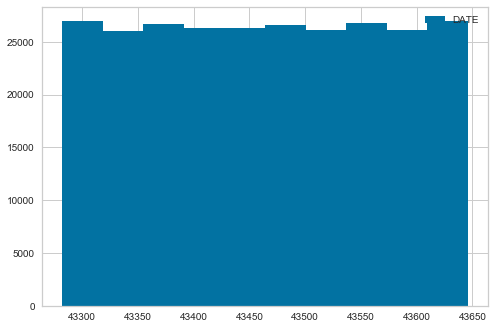

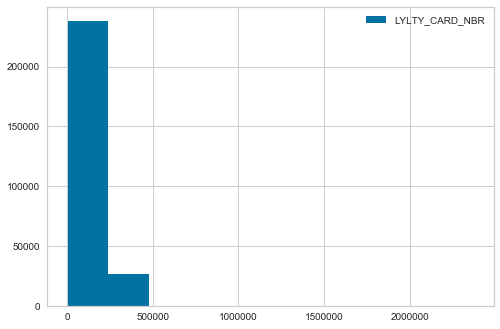

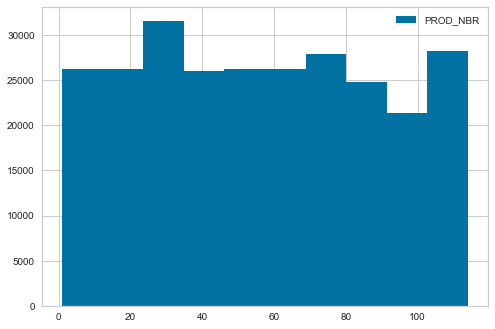

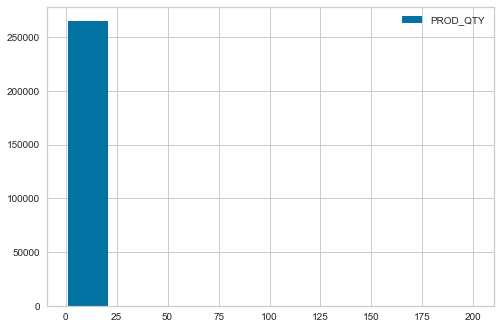

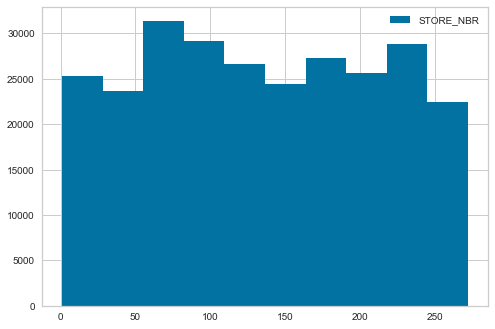

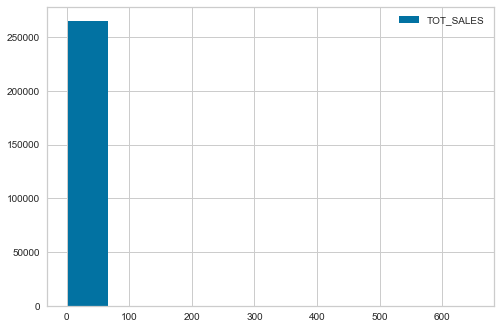

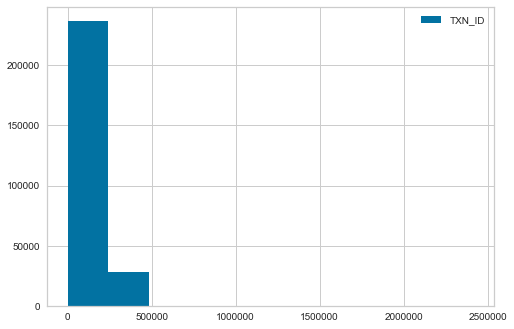

In [378]:
for col in (df_.select_dtypes('int64')|df_.select_dtypes('float')):
    plt.figure()
    df_[col].hist(label=col)
    plt.legend()
                                            

In [379]:
from datetime import datetime
df_['DATE']=df_['DATE'].apply(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x- 2)) # origin =1899‐12‐30


In [380]:
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


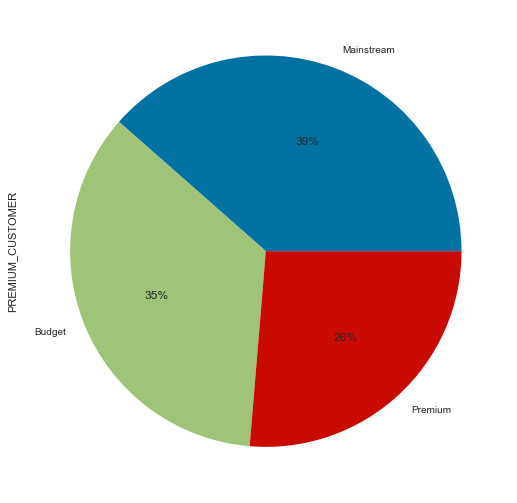

In [381]:
plt.figure(figsize=(9,9))
df_['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(df_['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False).index))
plt.show()

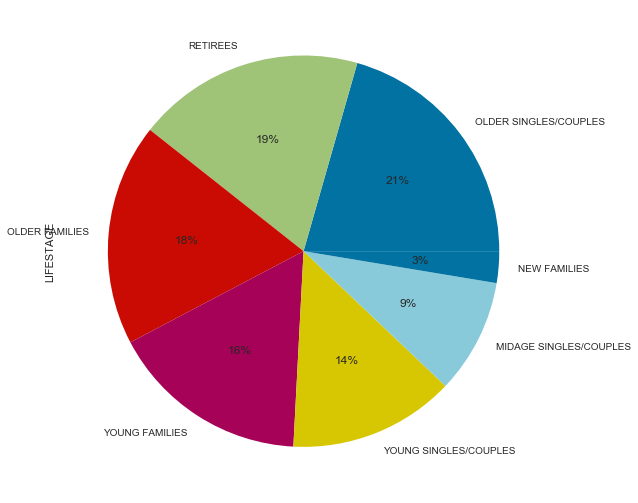

In [382]:
plt.figure(figsize=(9,9))
df_['LIFESTAGE'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(df_['LIFESTAGE'].value_counts().sort_values(ascending=False).index))
plt.show()

In [384]:
df_['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [385]:
df_['PROD_NAME'].value_counts(normalize=True)

Kettle Mozzarella   Basil & Pesto 175g      0.012476
Kettle Tortilla ChpsHny&Jlpno Chili 150g    0.012445
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    0.012343
Tyrrells Crisps     Ched & Chives 165g      0.012340
Cobs Popd Sea Salt  Chips 110g              0.012328
                                              ...   
RRD Pc Sea Salt     165g                    0.005403
Woolworths Medium   Salsa 300g              0.005400
NCC Sour Cream &    Garden Chives 175g      0.005358
French Fries Potato Chips 175g              0.005354
WW Crinkle Cut      Original 175g           0.005324
Name: PROD_NAME, Length: 114, dtype: float64

In [386]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from textblob import Word


In [387]:
#indexing with nltk
stop_words = set(stopwords.words('english'))
def identify_tokens(df_):
    word_tokens = word_tokenize(df_['PROD_NAME']) 
    #Delete ponctuation
    word_tokens=[word.lower() for word in word_tokens if word.isalpha()]
    #Delete stop words
    word_tokens_ = [w for w in word_tokens if not w in stop_words] 
    lem1= [Word(w).lemmatize("n") for w in word_tokens_] 
    lem2= [Word(w).lemmatize("v") for w in lem1] 
    lem3= [Word(w).lemmatize("n") for w in lem2]  
    return lem3

In [388]:
df_['words']= df_.apply(identify_tokens, axis=1) 
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,"[natural, chip, compny]"
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,"[cc, nacho, cheese]"
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,"[ww, original, stack, chip]"
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,"[cc, original]"
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,"[smith, crinkle, cut, chip, chicken]"


In [389]:
df_['words']= df_['words'].astype('str') 
df_['words']= df_['words'].str.replace("[", "") 
df_['words']= df_['words'].str.replace("]", "") 
df_['words']= df_['words'].str.replace(",", " ")
df_['words']= df_['words'].str.replace("'", "") 
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken


In [390]:
vec = CountVectorizer().fit(df_.words)
bag_of_words = vec.transform(df_.words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)

[('chip', 68415),
 ('kettle', 41288),
 ('salt', 34224),
 ('smith', 31823),
 ('cheese', 27890),
 ('pringles', 25102),
 ('doritos', 24962),
 ('crinkle', 23960),
 ('corn', 22063),
 ('original', 21560),
 ('cut', 20754),
 ('salsa', 18094),
 ('chicken', 15407),
 ('chilli', 15390),
 ('sea', 14145),
 ('thin', 14075),
 ('sour', 13882),
 ('crisp', 12607),
 ('vinegar', 12402),
 ('rrd', 11894),
 ('sweet', 11060),
 ('infuzions', 11057),
 ('supreme', 10963),
 ('chive', 10951),
 ('cream', 10723),
 ('ww', 10320),
 ('cob', 9693),
 ('popd', 9693),
 ('tortilla', 9580),
 ('tostitos', 9471),
 ('twisties', 9454),
 ('bbq', 9434),
 ('sensation', 9429),
 ('lime', 9347),
 ('old', 9324),
 ('el', 9324),
 ('paso', 9324),
 ('dip', 9324),
 ('tomato', 7669),
 ('thinly', 7507),
 ('tyrrells', 6442),
 ('tangy', 6332),
 ('sourcream', 6296),
 ('grain', 6272),
 ('wave', 6272),
 ('lightly', 6248),
 ('soy', 6121),
 ('natural', 6050),
 ('mild', 6048),
 ('red', 5885),
 ('rock', 5885),
 ('deli', 5885),
 ('thai', 4737),
 ('burge

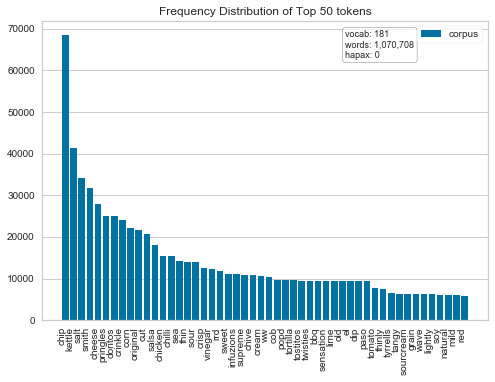

In [391]:
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
prods      = vectorizer.fit_transform(df_.words)
 
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(prods)
visualizer.show()

In [434]:
df=df_[df_['PROD_NAME'].str.contains('Salsa') == False]

In [393]:
df.shape

(246742, 11)

In [394]:
df['PROD_QTY'].describe() 

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [395]:
df[df['PROD_QTY']>=6]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,dorito corn chp supreme
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,dorito corn chp supreme


In [435]:
df=df[df['LYLTY_CARD_NBR']!=226000]

In [397]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [436]:
#adding new features
#Brand analysis
def Product_Brand(grp):
    return grp["words"].split()[0]
df["BRAND"] = df.apply(Product_Brand,axis=1)
df.head()

,DATE,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,GROUP,BRAND
0,2018-10-17,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,GROUP2,natural
1,2019-05-14,1307,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,GROUP3,cc
2,2018-11-10,1307,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,GROUP3,ww
3,2019-03-09,1307,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,GROUP3,cc
4,2019-05-20,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,GROUP3,smith


In [415]:
df["BRAND"].value_counts()

kettle       41288
smith        30353
pringles     25102
doritos      22041
thin         14075
rrd          11894
infuzions    11057
ww           10320
cob           9693
tostitos      9471
twisties      9454
tyrrells      6442
grain         6272
natural       6050
cheezels      4603
cc            4551
red           4427
dorito        3183
infzns        3144
cheetos       2927
snbts         1576
burger        1564
woolworth     1516
grnwves       1468
sunbites      1432
ncc           1419
french        1418
Name: BRAND, dtype: int64

In [437]:
# Clean brand names
d = {'red':'RRD','ww':'WOOLWORTHS','ncc':'NATURAL','snbts':'SUNBITES','infzns':'INFUZIONS','smith':'SMITHS','dorito':'DORITOS','grain':'GRNWVES'}
df['BRAND'] = df['BRAND'].str.lower().replace(d).str.upper()
df.head()

,DATE,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,GROUP,BRAND
0,2018-10-17,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,GROUP2,NATURAL
1,2019-05-14,1307,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,GROUP3,CC
2,2018-11-10,1307,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,GROUP3,WOOLWORTHS
3,2019-03-09,1307,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,GROUP3,CC
4,2019-05-20,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,GROUP3,SMITHS


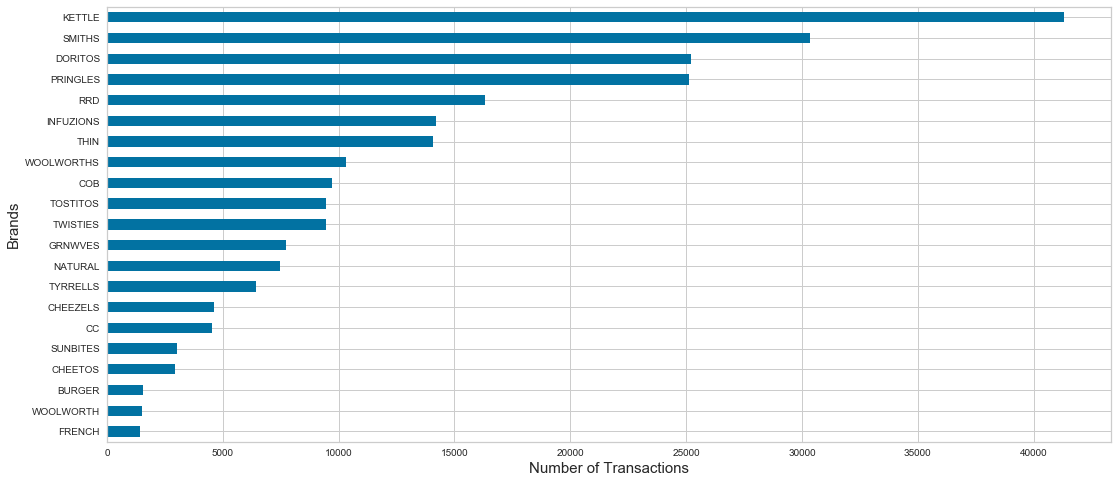

In [422]:
plt.xlabel('Number of Transactions',{'fontsize':15})
plt.ylabel('Brands',{'fontsize':15})
df.BRAND.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

In [443]:
#adding new features
#Pack_size analysis
df["P_SIZE"]=df["PROD_NAME"].apply(lambda x: ''.join([i for i in x if i.isdigit()]))
df.head()

,DATE,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,GROUP,BRAND,P_SIZE
0,2018-10-17,1000,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,GROUP2,NATURAL,175
1,2019-05-14,1307,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,GROUP3,CC,175
2,2018-11-10,1307,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,GROUP3,WOOLWORTHS,160
3,2019-03-09,1307,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,GROUP3,CC,175
4,2019-05-20,1343,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,GROUP3,SMITHS,170


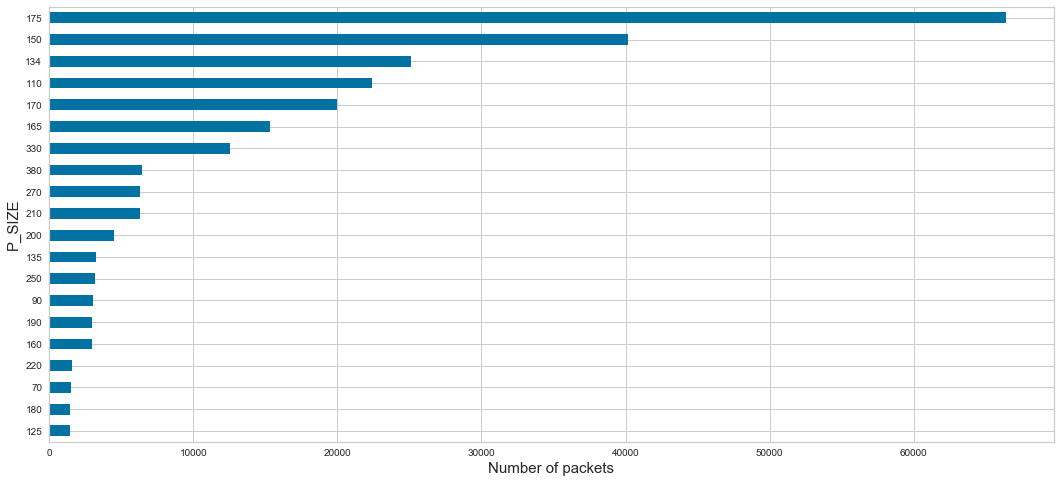

In [432]:
plt.xlabel('Number of packets',{'fontsize':15})
plt.ylabel('P_SIZE',{'fontsize':15})
df.P_SIZE.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

In [398]:
df['DATE'].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

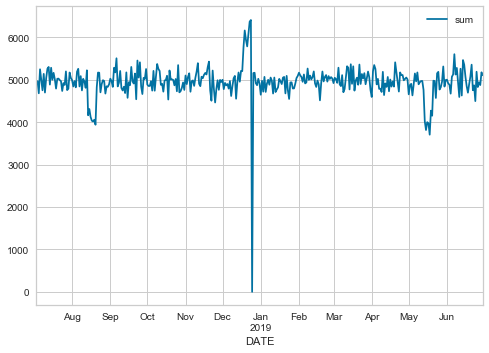

In [400]:
df_temp=df.copy()
df_temp.index = pd.to_datetime(df_temp['DATE'])
df_temp.loc["2018-07-03":"2019-07-02",'TOT_SALES'].resample('D').agg(['sum']).plot()

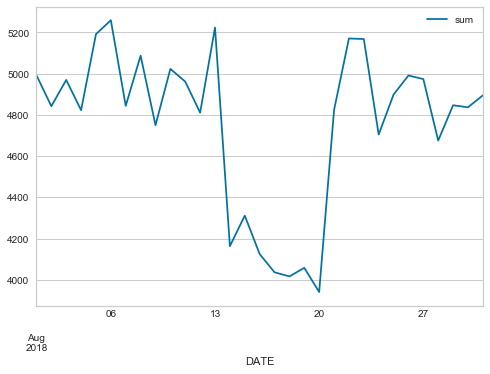

In [401]:
df_temp.loc["2018-08",'TOT_SALES'].resample('D').agg(['sum']).plot() #total des ventes <4000 20/8/2018

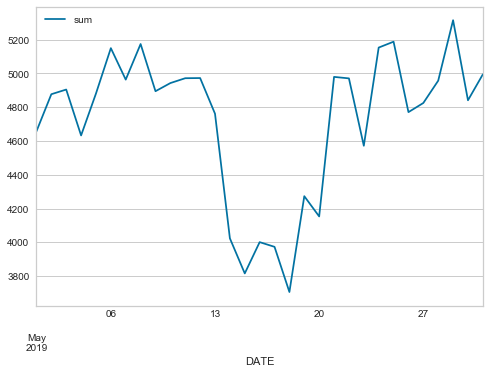

In [402]:

df_temp.loc["2019-05",'TOT_SALES'].resample('D').agg(['sum']).plot()


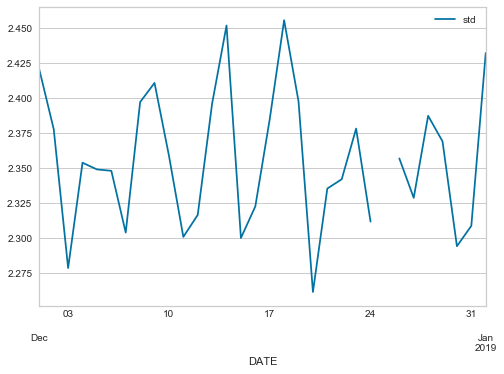

In [403]:
df_temp.loc["2018-12":"2019-1-1",'TOT_SALES'].resample('D').agg(['std']).plot()

In [409]:
df_temp.loc["2018-12",'TOT_SALES'].resample('D').agg(['mean','std','sum'])

,mean,std,sum
DATE,,,
2018-12-01,7.408741,2.420455,5000.9
2018-12-02,7.299389,2.377860,4781.1
2018-12-03,7.277696,2.278428,4927.0
2018-12-04,7.311411,2.353827,4869.4
2018-12-05,7.425000,2.349028,4900.5
2018-12-06,7.430853,2.348039,4792.9
2018-12-07,7.398363,2.303832,4971.7
2018-12-08,7.425080,2.397237,4618.4
2018-12-09,7.351745,2.410925,4844.8


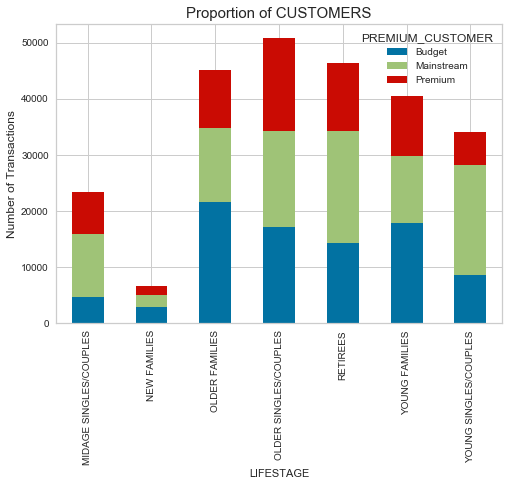

In [471]:
#visualize correlations between GROUPS and PREMIUM_CUSTOMER
ct=pd.crosstab(df.LIFESTAGE, df.PREMIUM_CUSTOMER)
bar_plot=ct.plot.bar(stacked=True)
plt.ylabel("Number of Transactions",{"fontsize":12})
plt.title('Proportion of CUSTOMERS',{'fontsize': 15})
#plt.legend(title='PREMIUM_CUSTOMER')
plt.show()

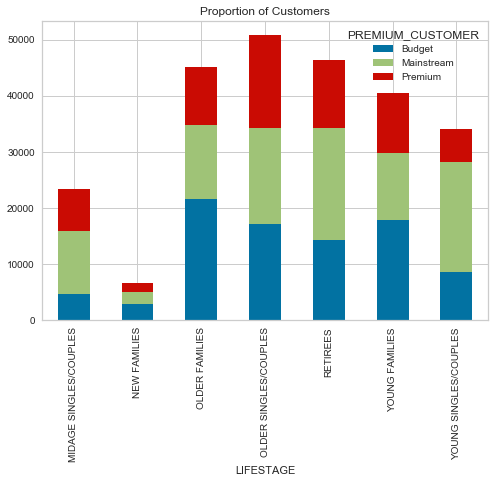

In [474]:
df_trunc1=df[['LIFESTAGE', 'PREMIUM_CUSTOMER','LYLTY_CARD_NBR']]
sub_df1=df_trunc1.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().sort_values(ascending=True)
sub_df1.unstack().plot(kind='bar',stacked=True,title="Proportion of Customers")


In [482]:
# Visualize correlation between Proportion of Customers/number of transactions
import plotly.express as px
df_corr = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['LYLTY_CARD_NBR']].count().reset_index()
fig = px.bar(df_corr,df_corr['LIFESTAGE'],df_corr['LYLTY_CARD_NBR'].unique(),df_corr['PREMIUM_CUSTOMER'],text=df_corr['LYLTY_CARD_NBR'].unique())
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
plt.ylabel("Number of Transactions",{"fontsize":12})
fig.update_layout(title='Proportion of Customers',title_x=0.5)
fig.show()

In [485]:
# Visualize correlation between Proportion of Customers/ total sales
df_corr = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()
fig = px.bar(df_corr,df_corr['LIFESTAGE'],df_corr['TOT_SALES'],df_corr['PREMIUM_CUSTOMER'],text=df_corr['TOT_SALES'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Sales',title_x=0.5)
fig.show()